<a href="https://colab.research.google.com/github/tanuiivy/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving Stars.csv to Stars.csv


**Q2-Clean data and carry out Exploratory Data Analysis**

1. Data Understanding

In [2]:
# Display first few rows
df.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [3]:
# Display last few rows
df.tail()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Hypergiant,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Hypergiant,Blue,O
237,8829,537493.0,1423.0,-10.73,5,Hypergiant,White,A
238,9235,404940.0,1112.0,-11.23,5,Hypergiant,White,A
239,37882,294903.0,1783.0,-7.80,5,Hypergiant,Blue,O


In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [5]:
# Summary statistics
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
#Describe the columns in the dataset.
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [7]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [8]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [9]:
#df['Star color'].unique()

In [10]:
df['Star category'].unique()

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
       'Supergiant', 'Hypergiant'], dtype=object)

In [11]:
df.groupby('Star type')['Star category'].unique()

,Star category
Star type,
0,[Brown Dwarf]
1,[Red Dwarf]
2,[White Dwarf]
3,[Main Sequence]
4,[Supergiant]
5,[Hypergiant]


In [12]:
df.duplicated().sum()

np.int64(0)

2. Data Cleaning

In [13]:
# Standardize 'Star color' column text
df['Star color'] = (
    df['Star color']
        .str.strip()   #remove duplicates
        .str.upper()    #make them uppercase
        .str.replace('-', ' ')  #anywhere with - use a space instead
)


In [14]:
#Confirm the columns are standardized.
df['Star color'].unique()

array(['RED', 'BLUE WHITE', 'WHITE', 'YELLOWISH WHITE',
       'PALE YELLOW ORANGE', 'BLUE', 'WHITISH', 'YELLOW WHITE', 'ORANGE',
       'WHITE YELLOW', 'YELLOWISH', 'ORANGE RED'], dtype=object)

**Exploratory Data Analysis**


INSIGHT 1: Distribution of Stellar Properties


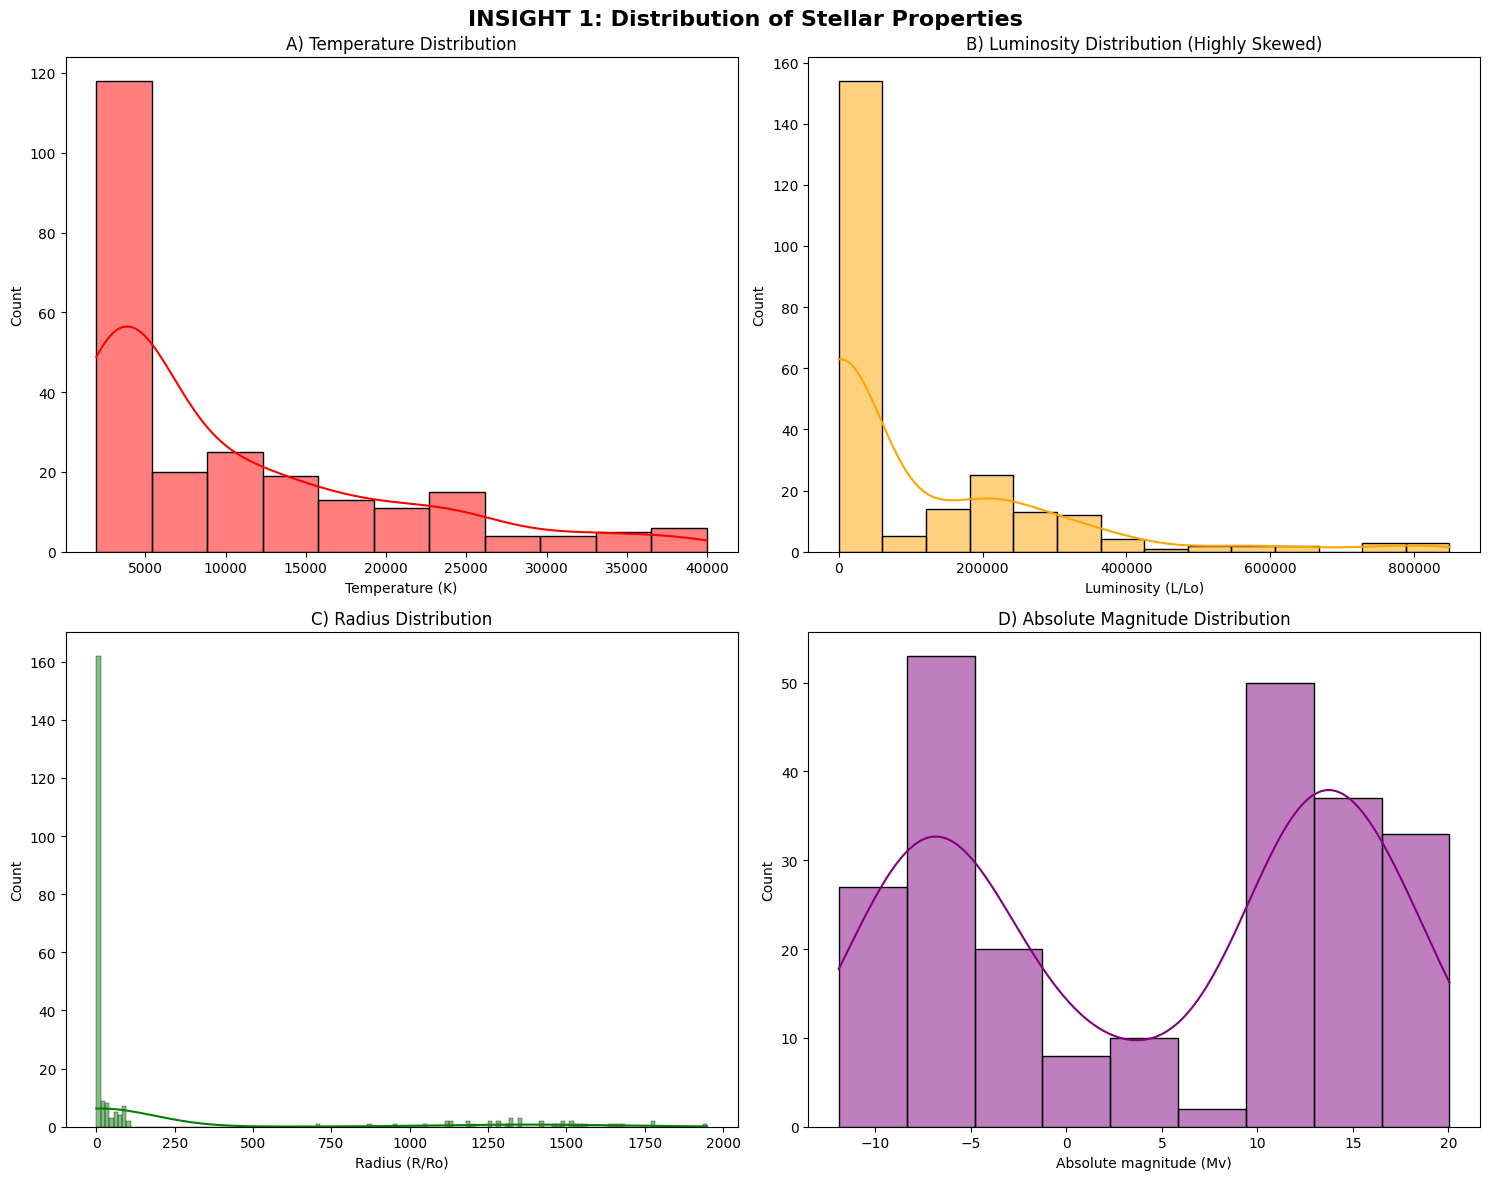

All numerical features show strong skewness.


In [15]:
# INSIGHT 1: Distribution of Stellar Properties
print("\nINSIGHT 1: Distribution of Stellar Properties")
# Create subplots for all histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('INSIGHT 1: Distribution of Stellar Properties', fontsize=16, fontweight='bold')

# Temperature distribution
sns.histplot(data=df, x='Temperature (K)', kde=True, ax=axes[0,0], color='red')
axes[0,0].set_title('A) Temperature Distribution')
axes[0,0].set_xlabel('Temperature (K)')
axes[0,0].set_ylabel('Count')

# Luminosity distribution (log scale for better visualization)
sns.histplot(data=df, x='Luminosity (L/Lo)', kde=True, ax=axes[0,1], color='orange')
axes[0,1].set_title('B) Luminosity Distribution (Highly Skewed)')
axes[0,1].set_xlabel('Luminosity (L/Lo)')
axes[0,1].set_ylabel('Count')

# Radius distribution
sns.histplot(data=df, x='Radius (R/Ro)', kde=True, ax=axes[1,0], color='green')
axes[1,0].set_title('C) Radius Distribution')
axes[1,0].set_xlabel('Radius (R/Ro)')
axes[1,0].set_ylabel('Count')

# Absolute magnitude distribution
sns.histplot(data=df, x='Absolute magnitude (Mv)', kde=True, ax=axes[1,1], color='purple')
axes[1,1].set_title('D) Absolute Magnitude Distribution')
axes[1,1].set_xlabel('Absolute magnitude (Mv)')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("All numerical features show strong skewness.")




INSIGHT 2: Star Type Distribution (Class Balance)

Star Type Counts:
Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64


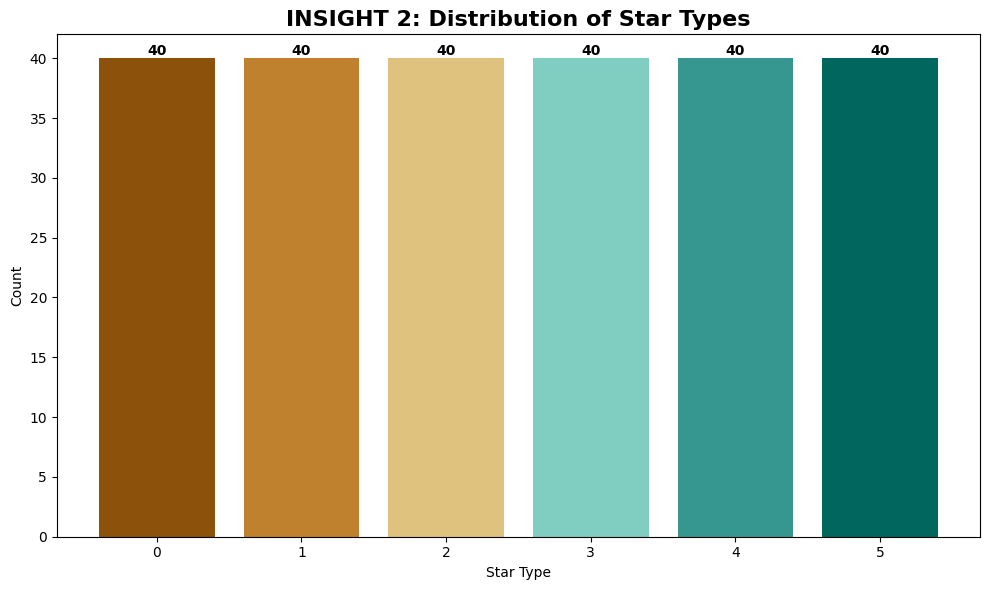

Dataset is perfectly balanced with 40 samples per star type.


In [16]:
# INSIGHT 2: Class Distribution
print("\n\nINSIGHT 2: Star Type Distribution (Class Balance)")

star_counts = df['Star type'].value_counts().sort_index()
print("\nStar Type Counts:")
print(star_counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(star_counts.index, star_counts.values, color=['#8c510a', '#bf812d', '#dfc27d', '#80cdc1', '#35978f', '#01665e'])
plt.title('INSIGHT 2: Distribution of Star Types', fontsize=16, fontweight='bold')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.xticks(star_counts.index)

# Add value labels on bars
for i, (idx, val) in enumerate(zip(star_counts.index, star_counts.values)):
    plt.text(idx, val, str(val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Dataset is perfectly balanced with 40 samples per star type.")




INSIGHT 3: Exponential Growth in Luminosity Across Star Types
--------------------------------------------------------------------------------


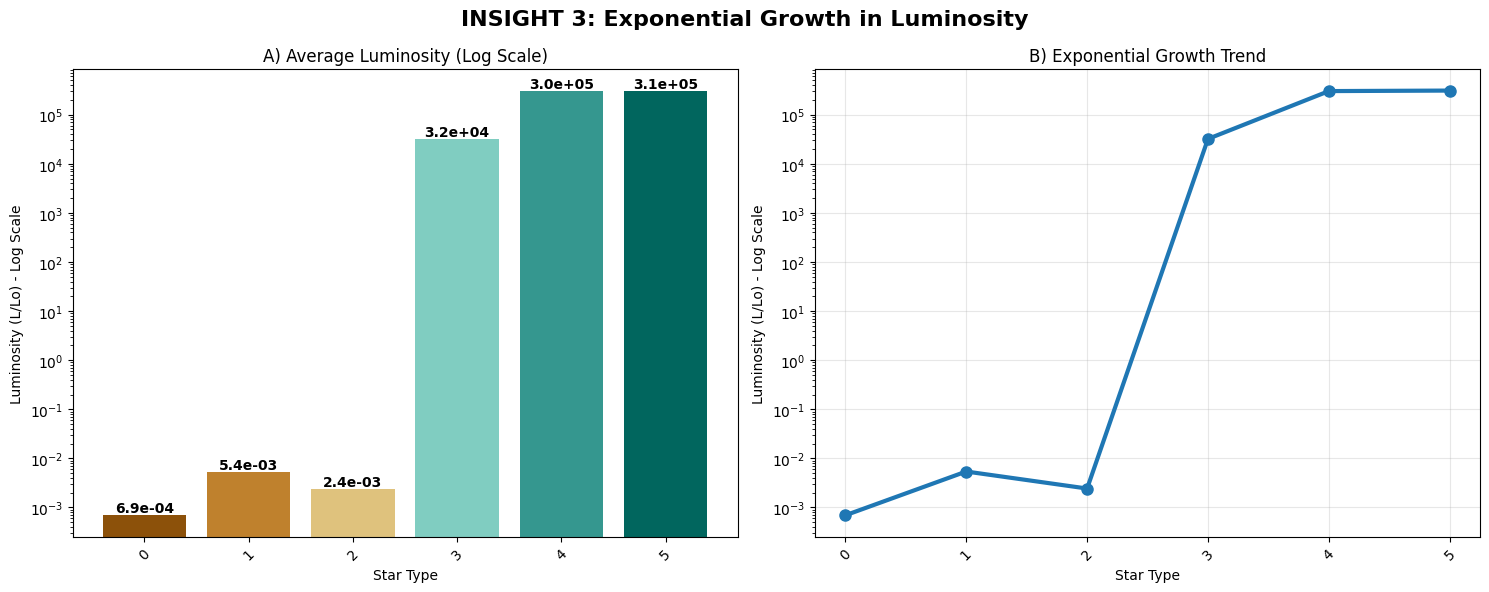


LUMINOSITY GROWTH ACROSS STAR TYPES:
Type 0:        6.93e-04 L/Lo
Type 1:        5.41e-03 L/Lo
Type 2:        2.43e-03 L/Lo
Type 3:        3.21e+04 L/Lo
Type 4:        3.02e+05 L/Lo
Type 5:        3.09e+05 L/Lo
Luminosity increases exponentially with star type.


In [17]:
# INSIGHT 3: Exponential Growth in Luminosity
print("\n\nINSIGHT 3: Exponential Growth in Luminosity Across Star Types")
print("-"*80)

# Calculate mean luminosity by star type
lum_stats = df.groupby('Star type')['Luminosity (L/Lo)'].agg(['mean', 'std'])

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('INSIGHT 3: Exponential Growth in Luminosity', fontsize=16, fontweight='bold')

# Plot 1: Bar chart with log scale
bars = ax1.bar(lum_stats.index, lum_stats['mean'],
               color=['#8c510a', '#bf812d', '#dfc27d', '#80cdc1', '#35978f', '#01665e'])
ax1.set_yscale('log')
ax1.set_title('A) Average Luminosity (Log Scale)')
ax1.set_ylabel('Luminosity (L/Lo) - Log Scale')
ax1.set_xlabel('Star Type')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Add value labels on bars
for i, (star_type, mean_lum) in enumerate(zip(lum_stats.index, lum_stats['mean'])):
    ax1.text(i, mean_lum, f'{mean_lum:.1e}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Line plot showing exponential trend
ax2.plot(lum_stats.index, lum_stats['mean'], 'o-', linewidth=3, markersize=8)
ax2.set_yscale('log')
ax2.set_title('B) Exponential Growth Trend')
ax2.set_ylabel('Luminosity (L/Lo) - Log Scale')
ax2.set_xlabel('Star Type')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print("\nLUMINOSITY GROWTH ACROSS STAR TYPES:")
for i, (star_type, mean_lum) in enumerate(zip(lum_stats.index, lum_stats['mean'])):
    print(f"Type {star_type}: {mean_lum:>15.2e} L/Lo")

print("Luminosity increases exponentially with star type.")



INSIGHT 4: Feature Correlations
--------------------------------------------------------------------------------


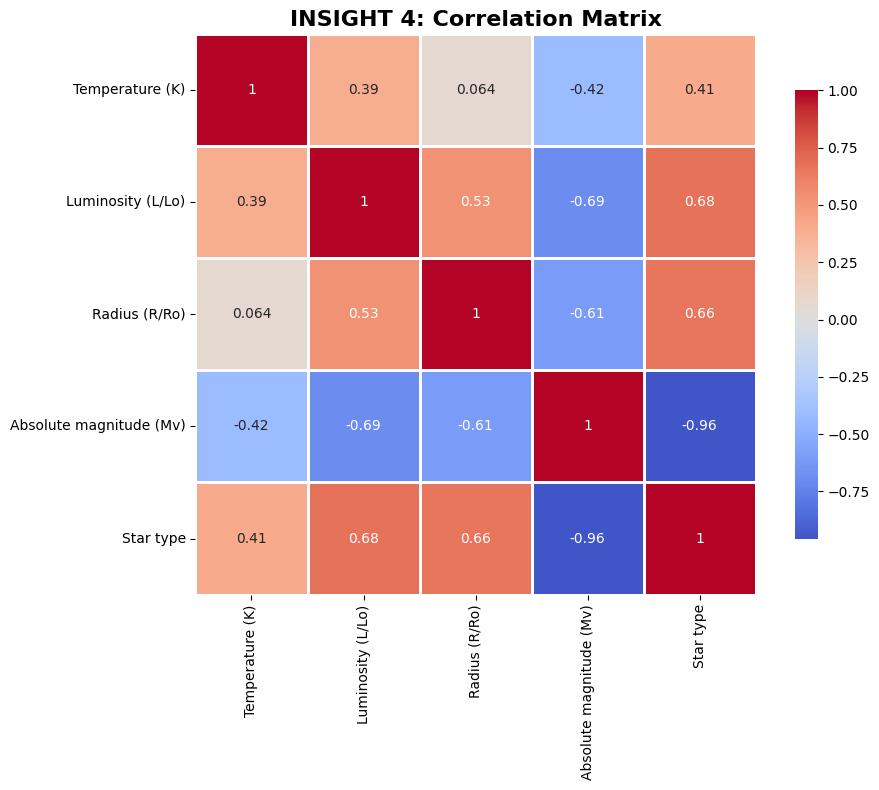


Key Correlations with Star Type:
Absolute magnitude (Mv): -0.955
Luminosity (L/Lo): 0.677
Radius (R/Ro): 0.661
Temperature (K): 0.411
Absolute magnitude shows the strongest correlation (-0.96)


In [18]:
# INSIGHT 4: Correlation Matrix
print("\n\nINSIGHT 4: Feature Correlations")
print("-"*80)

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('INSIGHT 4: Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Star Type:")
print(f"Absolute magnitude (Mv): {corr.loc['Star type', 'Absolute magnitude (Mv)']:.3f}")
print(f"Luminosity (L/Lo): {corr.loc['Star type', 'Luminosity (L/Lo)']:.3f}")
print(f"Radius (R/Ro): {corr.loc['Star type', 'Radius (R/Ro)']:.3f}")
print(f"Temperature (K): {corr.loc['Star type', 'Temperature (K)']:.3f}")

print("Absolute magnitude shows the strongest correlation (-0.96)")


**Q3. Create a model based on the k-Nearest Neighbours algorithm for classificationbased on at least 2 suitable features for one target variable.**

In [19]:
#Feature Selection
print("\nFEATURE SELECTION:")

print("Selected features based on correlation analysis:")
print("1. Absolute magnitude (Mv): -0.96 (strongest predictor)")
print("2. Luminosity (L/Lo): 0.68 (second strongest)")

X = df[['Absolute magnitude (Mv)', 'Luminosity (L/Lo)']]
y = df['Star type']





FEATURE SELECTION:
Selected features based on correlation analysis:
1. Absolute magnitude (Mv): -0.96 (strongest predictor)
2. Luminosity (L/Lo): 0.68 (second strongest)


In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


Training set size: 192 samples
Test set size: 48 samples


In [21]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler.")


Features scaled using StandardScaler.


In [22]:
# Find optimal k using cross-validation
print("\n\nFINDING OPTIMAL K:")

cv_scores_mean = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores_mean.append(scores.mean())

optimal_k = k_range[np.argmax(cv_scores_mean)]
print(f"Optimal k: {optimal_k}")
print(f"Best cross-validation accuracy: {max(cv_scores_mean):.4f}")



FINDING OPTIMAL K:
Optimal k: 4
Best cross-validation accuracy: 0.8126


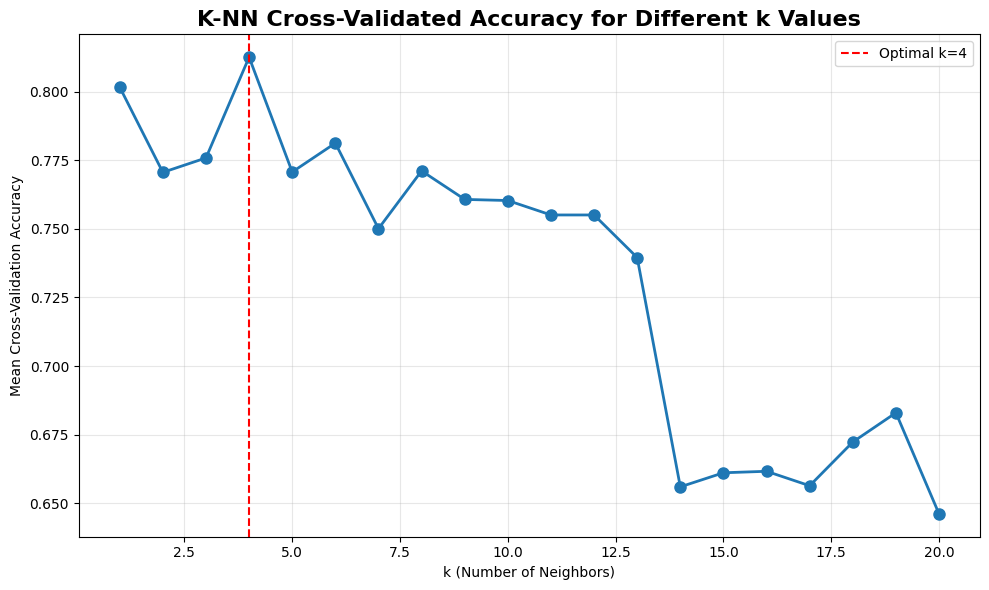

In [23]:
# Plot cross-validated accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores_mean, marker='o', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.title('K-NN Cross-Validated Accuracy for Different k Values', fontsize=16, fontweight='bold')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Cross-validation scores with optimal k
print("\n\nMODEL TRAINING WITH OPTIMAL K:")

knn_cv = KNeighborsClassifier(n_neighbors=optimal_k)
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)

print(f"Cross-validation scores (5-fold): {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")



MODEL TRAINING WITH OPTIMAL K:
Cross-validation scores (5-fold): [0.82051282 0.79487179 0.68421053 0.86842105 0.89473684]
Mean CV accuracy: 0.8126 (+/- 0.0731)


In [25]:
# Train final model
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_final.predict(X_test_scaled)

# Evaluate
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nTest Accuracy: {test_accuracy_knn:.4f}")


Test Accuracy: 0.7292




CONFUSION MATRIX:
--------------------------------------------------------------------------------


<Figure size 800x600 with 0 Axes>

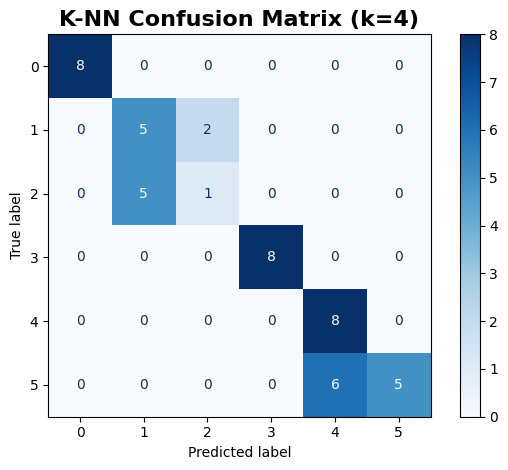


INTERPRETATION:
The k-NN model with k=4 achieved 72.9% accuracy on test data.
The confusion matrix shows the model's performance across all star types.


In [26]:
# Confusion Matrix
print("\n\nCONFUSION MATRIX:")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='Blues')
plt.title(f'K-NN Confusion Matrix (k={optimal_k})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nINTERPRETATION:")
print(f"The k-NN model with k={optimal_k} achieved {test_accuracy_knn:.1%} accuracy on test data.")
print("The confusion matrix shows the model's performance across all star types.")


Q4. Create another eager learning classifier as assigned based on at least 2 suitable
features for one target variable.

In [44]:
X = df[['Absolute magnitude (Mv)', 'Luminosity (L/Lo)']]
y = df['Star type']


In [45]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 192 samples
Test set size: 48 samples


In [67]:
# Training a Decision Tree
print("\n\nMODEL TRAINING:")
print("-"*80)

model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

print("Decision Tree trained with max_depth=4")



MODEL TRAINING:
--------------------------------------------------------------------------------
Decision Tree trained with max_depth=4


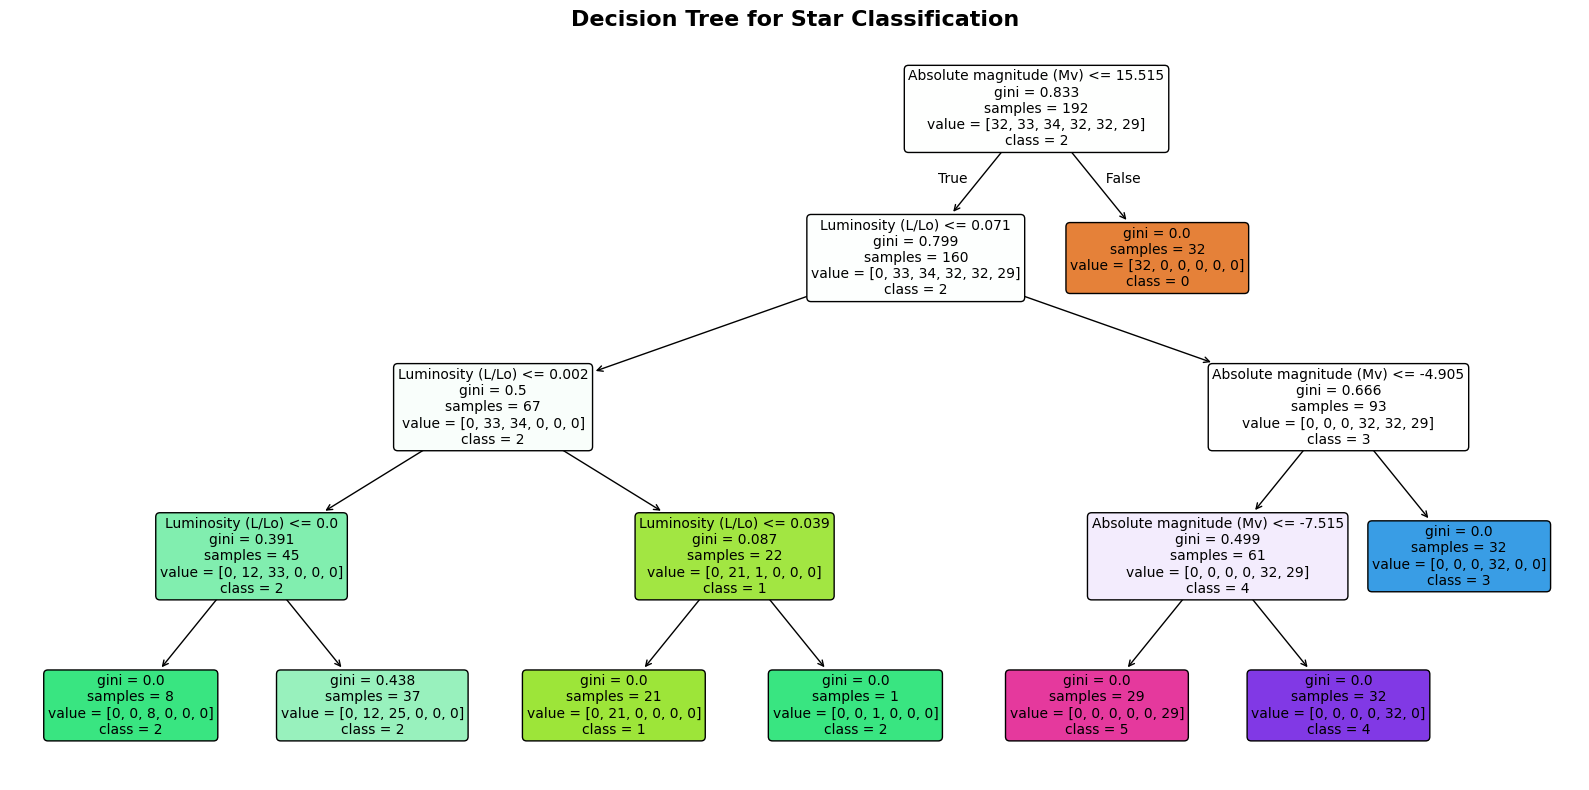

In [47]:
# Visualizing the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(model,
          feature_names=['Absolute magnitude (Mv)', 'Luminosity (L/Lo)'],
          class_names=[str(cls) for cls in model.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Star Classification", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
# Evaluate model on test data
y_pred_dt = model.predict(X_test)


In [49]:
# Show the first few predictions alongside actual values
results_dt = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_dt
})

print("\n\nSAMPLE PREDICTIONS:")
print(results_dt.head(10))



SAMPLE PREDICTIONS:
   Actual  Predicted
0       2          1
1       0          0
2       3          3
3       4          4
4       4          4
5       5          5
6       5          5
7       2          2
8       0          0
9       2          2


In [50]:
# Performing 5-fold cross-validation
print("\n\nCROSS-VALIDATION:")

cv_scores_dt = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (5-fold): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f} (+/- {cv_scores_dt.std():.4f})")

# Test accuracy
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_accuracy_dt:.4f}")



CROSS-VALIDATION:
Cross-Validation Scores (5-fold): [0.91666667 0.9375     0.89583333 0.9375     0.9375    ]
Mean CV Accuracy: 0.9250 (+/- 0.0167)
Test Accuracy: 0.9375




CONFUSION MATRIX:


<Figure size 800x600 with 0 Axes>

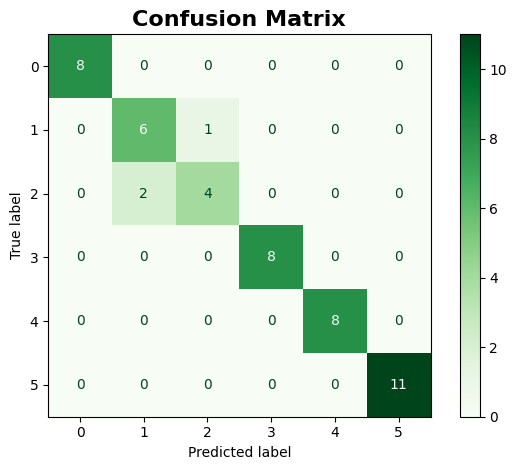

The Decision Tree model achieved 93.8% accuracy on test data.


In [66]:
# Confusion Matrix
print("\n\nCONFUSION MATRIX:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
labels_dt = [str(cls) for cls in model.classes_]

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels_dt)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"The Decision Tree model achieved {test_accuracy_dt:.1%} accuracy on test data.")

Q5. For the eager learner created in Q4, create another model with tuned
hyperparameters that enhance the accuracy of classification.

In [53]:
#Prepare features and target

X = df[['Absolute magnitude (Mv)', 'Luminosity (L/Lo)']]
y = df['Star type']

In [54]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Base model
dt = DecisionTreeClassifier(random_state=42)

In [60]:
# Defining hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"\nTotal combinations to test: {len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])}")



Total combinations to test: 216


In [59]:
# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


criterion: entropy
max_depth: 3
min_samples_leaf: 1
min_samples_split: 2

Best Cross-Validation Accuracy: 0.9333


In [61]:
#Create and train the tuned model
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluating tuned model
cv_scores_tuned = cross_val_score(best_dt, X, y, cv=5)
print(f"Cross-Validation Scores (5-fold): {cv_scores_tuned}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_tuned):.4f} (+/- {cv_scores_tuned.std():.4f})")

Cross-Validation Scores (5-fold): [0.91666667 0.97916667 0.89583333 0.9375     0.9375    ]
Mean CV Accuracy: 0.9333 (+/- 0.0276)


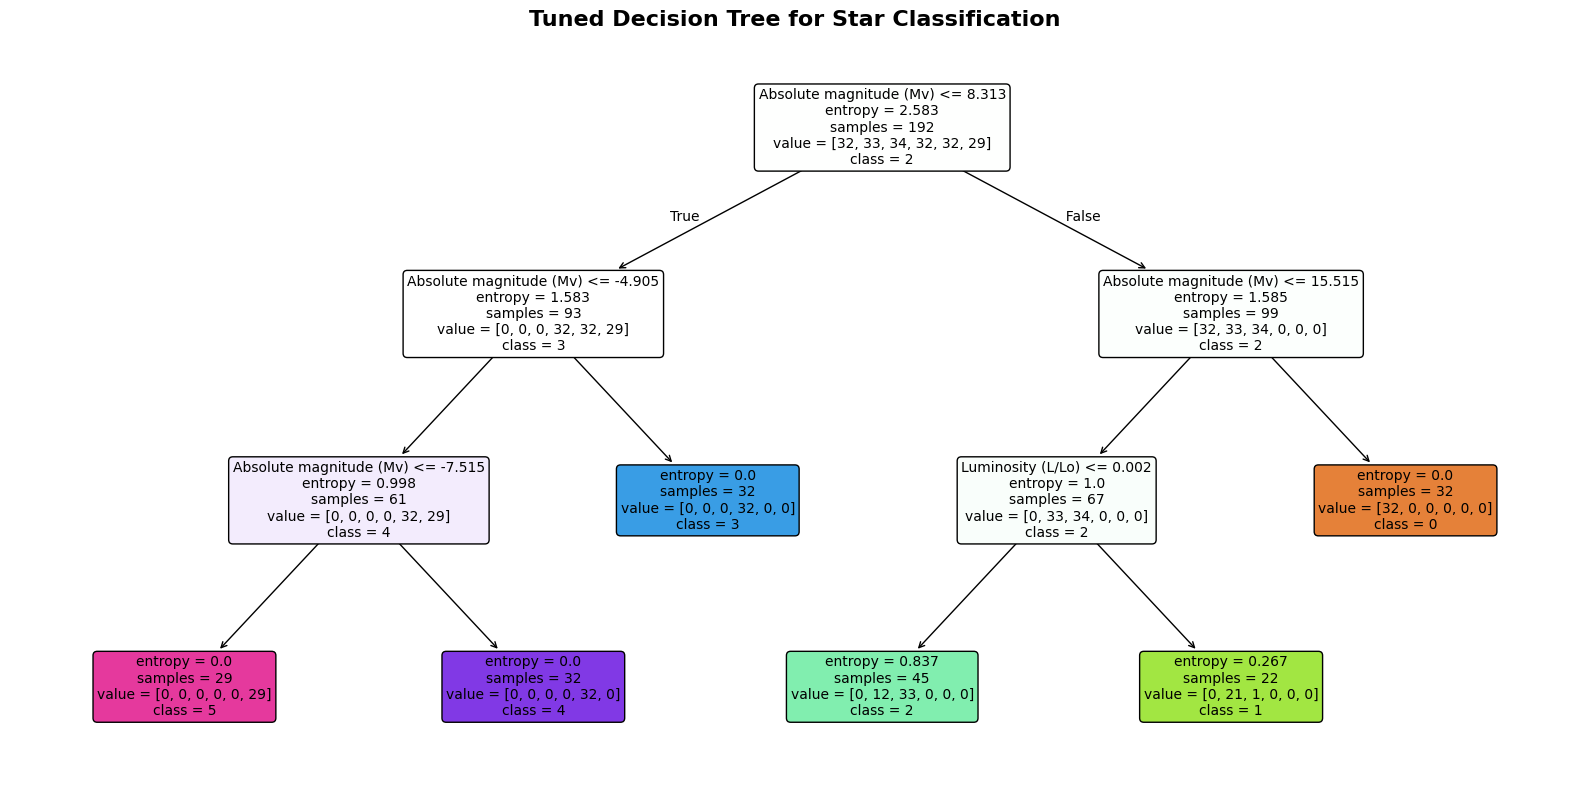

In [63]:
# Visualizing the tuned Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(best_dt,
          feature_names=['Absolute magnitude (Mv)', 'Luminosity (L/Lo)'],
          class_names=[str(cls) for cls in best_dt.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Tuned Decision Tree for Star Classification", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [64]:
# Make predictions using the testing data
y_pred_tuned = best_dt.predict(X_test)

# Test accuracy
test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTest Accuracy: {test_accuracy_tuned:.4f}")

# Compare Actual vs Predicted Categories
results_tuned = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_tuned
})

print("\n\nSAMPLE PREDICTIONS:")
print(results_tuned.head(10))


Test Accuracy: 0.9375


SAMPLE PREDICTIONS:
   Actual  Predicted
0       2          1
1       0          0
2       3          3
3       4          4
4       4          4
5       5          5
6       5          5
7       2          2
8       0          0
9       2          2




CONFUSION MATRIX:


<Figure size 800x600 with 0 Axes>

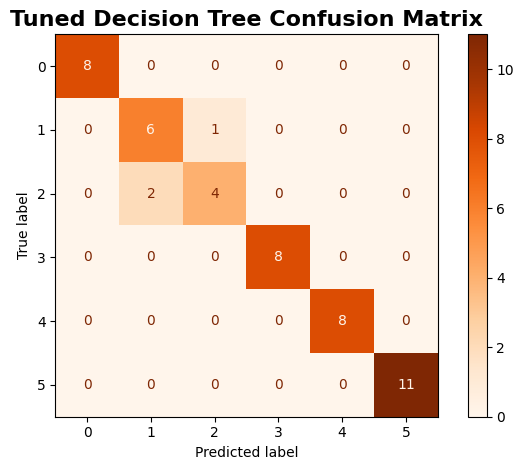

The tuned Decision Tree model achieved 93.8% accuracy on test data.


In [65]:
# Confusion Matrix
print("\n\nCONFUSION MATRIX:")

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_dt.classes_)
disp.plot(cmap='Oranges')
plt.title("Tuned Decision Tree Confusion Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"The tuned Decision Tree model achieved {test_accuracy_tuned:.1%} accuracy on test data.")

Q6. Evaluate the performances of the three models created in Q3, Q4 and Q5. Use the confusion matrix metric to evaluate the performances

Q6: MODEL PERFORMANCE COMPARISON

Comparing all three models:
1. k-Nearest Neighbors (k=4)
2. Decision Tree (base model)
3. Tuned Decision Tree (optimized hyperparameters)


CONFUSION MATRICES COMPARISON:
--------------------------------------------------------------------------------


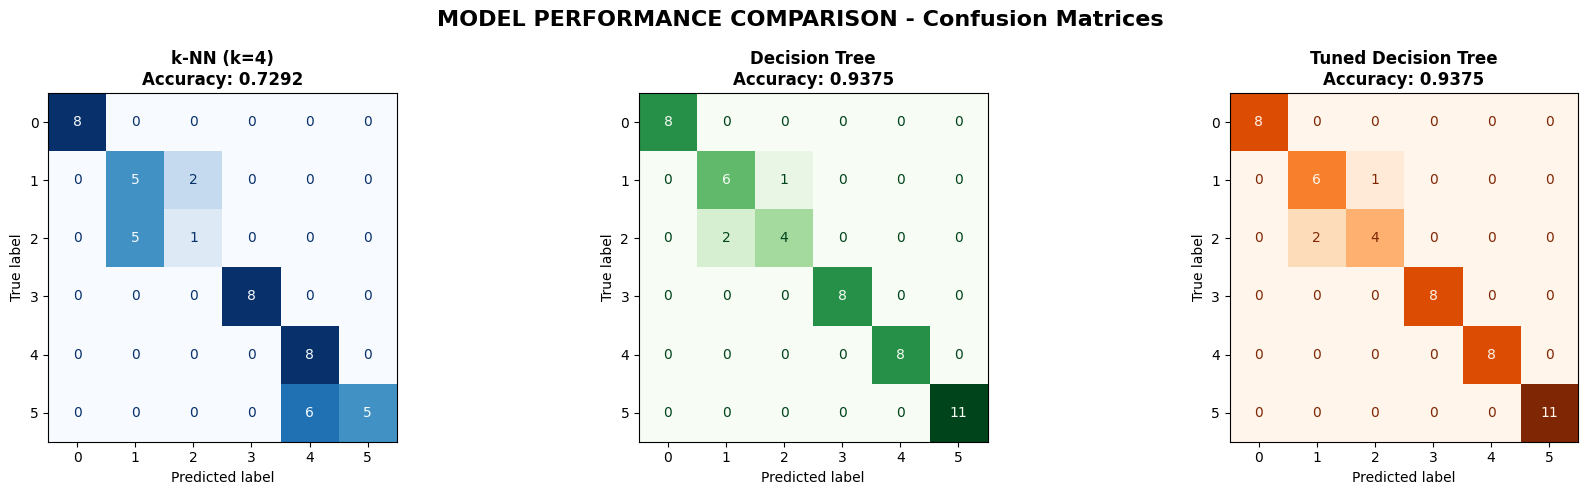

In [68]:
print("Q6: MODEL PERFORMANCE COMPARISON")

print("\nComparing all three models:")
print("1. k-Nearest Neighbors (k={})".format(optimal_k))
print("2. Decision Tree (base model)")
print("3. Tuned Decision Tree (optimized hyperparameters)")

# SIDE-BY-SIDE CONFUSION MATRICES
print("\n\nCONFUSION MATRICES COMPARISON:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('MODEL PERFORMANCE COMPARISON - Confusion Matrices', fontsize=16, fontweight='bold')

# Model 1: k-NN
ConfusionMatrixDisplay(cm_knn).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'k-NN (k={optimal_k})\nAccuracy: {test_accuracy_knn:.4f}', fontweight='bold')

# Model 2: Decision Tree
ConfusionMatrixDisplay(cm_dt).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title(f'Decision Tree\nAccuracy: {test_accuracy_dt:.4f}', fontweight='bold')

# Model 3: Tuned Decision Tree
ConfusionMatrixDisplay(cm_tuned).plot(ax=axes[2], cmap='Oranges', colorbar=False)
axes[2].set_title(f'Tuned Decision Tree\nAccuracy: {test_accuracy_tuned:.4f}', fontweight='bold')

plt.tight_layout()
plt.show()